<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/11th_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [2]:
# Upload your dataset file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
# Load data from CSV file
data = pd.read_csv("Housing.csv")

# Extract the closing prices
prices = data["area"].values.astype('int')

# Normalize the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Define the input dimension
input_dim = prices_scaled.shape[1]


In [6]:
# Define the encoder and decoder dimensions
encoding_dim = 5  # Dimensionality of the encoded representation

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [7]:
# Train the model
num_epochs = 50
batch_size = 32

history = autoencoder.fit(prices_scaled, prices_scaled,
                          epochs=num_epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_split=0.2)

Epoch 1/50
14/14 [==============================] - 1s 16ms/step - loss: 0.0830 - val_loss: 0.1341
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0802 - val_loss: 0.1304
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0776 - val_loss: 0.1270
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0753 - val_loss: 0.1239
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0731 - val_loss: 0.1212
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0711 - val_loss: 0.1187
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0694 - val_loss: 0.1164
Epoch 8/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0678 - val_loss: 0.1143
Epoch 9/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0663 - val_loss: 0.1121
Epoch 10/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0648 - val_loss: 0.1100
Epoch 11/50
14/14 

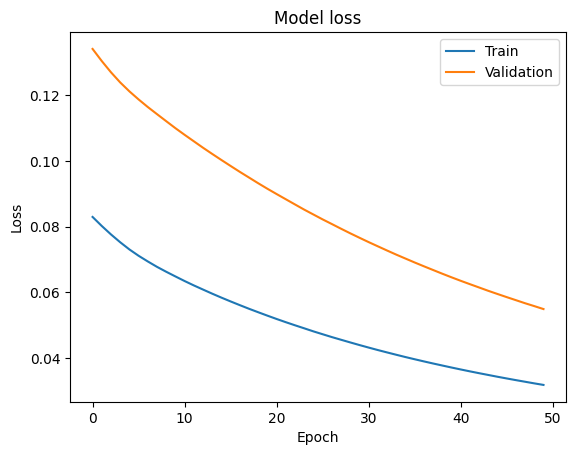

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [12]:

X_train = np.random.rand( input_dim)
X_test = np.random.rand(100, input_dim)  # For testing late

# Extract the encoder part of the autoencoder
encoder = Model(input_layer, encoded)

# Encode data for dimensionality reduction
encoded_data = encoder.predict(X_test)

# Dimensions of the encoded data
print("Encoded data shape:", encoded_data.shape)


4/4 [==============================] - 0s 5ms/step
Encoded data shape: (100, 5)
